# Ejemplo 1: Clasificación simple con un árbol de decisión


Accuracy del Árbol de Decisión (Gini): 0.80
Matriz de Confusión:
 [[14  5]
 [ 3 18]]
Reporte de Clasificación:
               precision    recall  f1-score   support

     Clase 0       0.82      0.74      0.78        19
     Clase 1       0.78      0.86      0.82        21

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



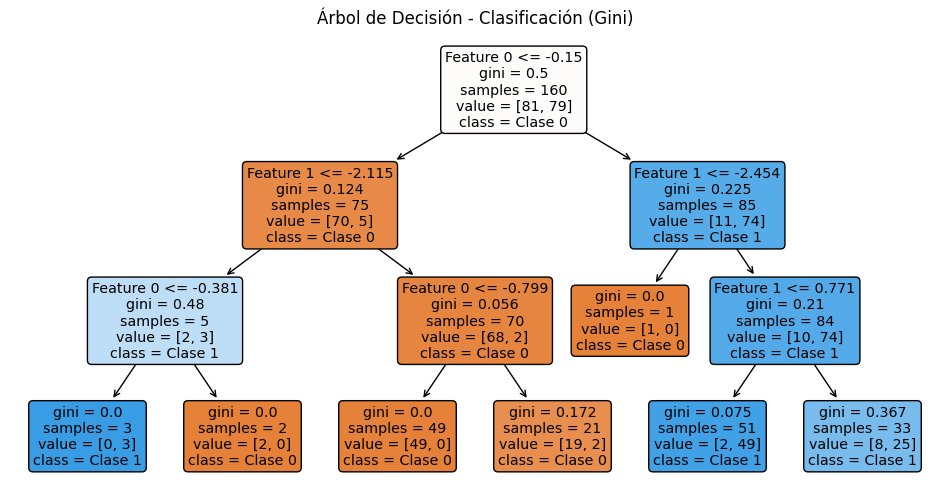

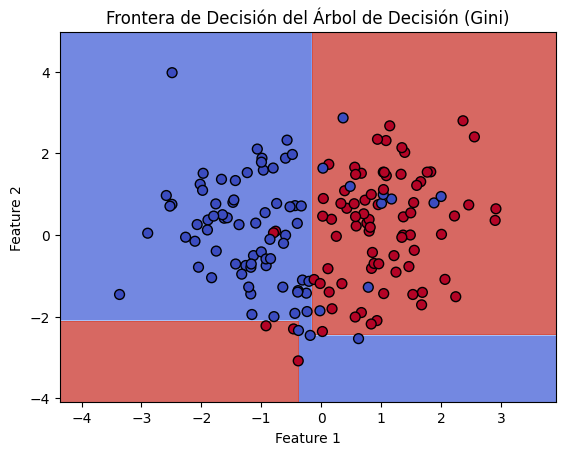

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
# 1. Generar un conjunto de datos sintético para clasificación binaria
X_class, y_class = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# 2. Dividir el dataset en conjuntos de entrenamiento y prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# 3. Entrenar un árbol de decisión con el criterio Gini
dt_classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_classifier_gini.fit(X_train_c, y_train_c)

# 4. Predecir en el conjunto de prueba
y_pred_c_gini = dt_classifier_gini.predict(X_test_c)

# 5. Calcular la precisión del modelo
accuracy_gini = accuracy_score(y_test_c, y_pred_c_gini)
print(f'Accuracy del Árbol de Decisión (Gini): {accuracy_gini:.2f}')

# 6. Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test_c, y_pred_c_gini)
print("Matriz de Confusión:\n", conf_matrix)

# 7. Mostrar el reporte de clasificación
class_report = classification_report(y_test_c, y_pred_c_gini, target_names=['Clase 0', 'Clase 1'])
print("Reporte de Clasificación:\n", class_report)

# 8. Visualizar el árbol de decisión
plt.figure(figsize=(12, 6))
plot_tree(dt_classifier_gini, feature_names=[f'Feature {i}' for i in range(2)], class_names=['Clase 0', 'Clase 1'], filled=True, rounded=True)
plt.title('Árbol de Decisión - Clasificación (Gini)')
plt.show()

# 9. Visualizar la frontera de decisión
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X_train_c, y_train_c, dt_classifier_gini, "Frontera de Decisión del Árbol de Decisión (Gini)")

# Árbol de decisión con criterio Entropía


Accuracy del Árbol de Decisión (Entropía): 0.80


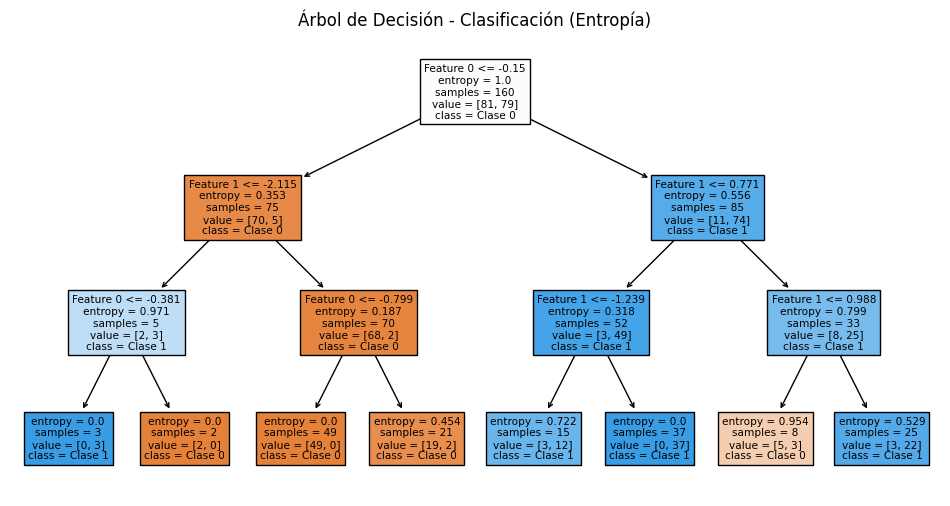

In [8]:
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_classifier_entropy.fit(X_train_c, y_train_c)

y_pred_c_entropy = dt_classifier_entropy.predict(X_test_c)
accuracy_entropy = accuracy_score(y_test_c, y_pred_c_entropy)
print(f'Accuracy del Árbol de Decisión (Entropía): {accuracy_entropy:.2f}')

plt.figure(figsize=(12, 6))
plot_tree(dt_classifier_entropy, feature_names=[f'Feature {i}' for i in range(2)], class_names=['Clase 0', 'Clase 1'], filled=True)
plt.title('Árbol de Decisión - Clasificación (Entropía)')
plt.show()

# Ejemplo 2: Clasificación más compleja con 4 características


Accuracy del Árbol de Decisión (Clasificación Compleja): 0.93


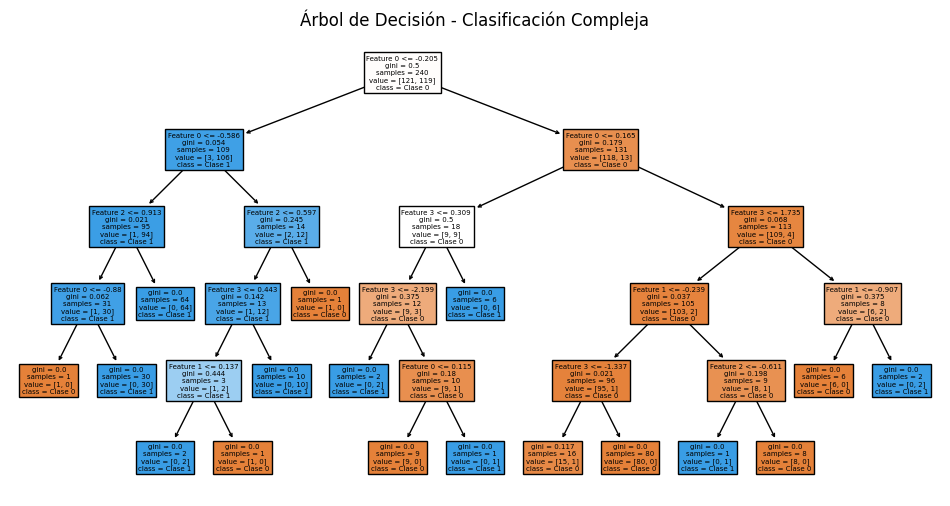

In [9]:
X_class_complex, y_class_complex = make_classification(n_samples=300, n_features=4, random_state=42)
X_train_cx, X_test_cx, y_train_cx, y_test_cx = train_test_split(X_class_complex, y_class_complex, test_size=0.2, random_state=42)

dt_classifier_complex = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier_complex.fit(X_train_cx, y_train_cx)

y_pred_cx = dt_classifier_complex.predict(X_test_cx)
accuracy_complex = accuracy_score(y_test_cx, y_pred_cx)
print(f'Accuracy del Árbol de Decisión (Clasificación Compleja): {accuracy_complex:.2f}')

plt.figure(figsize=(12, 6))
plot_tree(dt_classifier_complex, feature_names=[f'Feature {i}' for i in range(4)], class_names=['Clase 0', 'Clase 1'], filled=True)
plt.title('Árbol de Decisión - Clasificación Compleja')
plt.show()


# Ejemplo 3: Regresión con Árbol de Decisión

MSE del Árbol de Decisión (Regresión): 0.0141


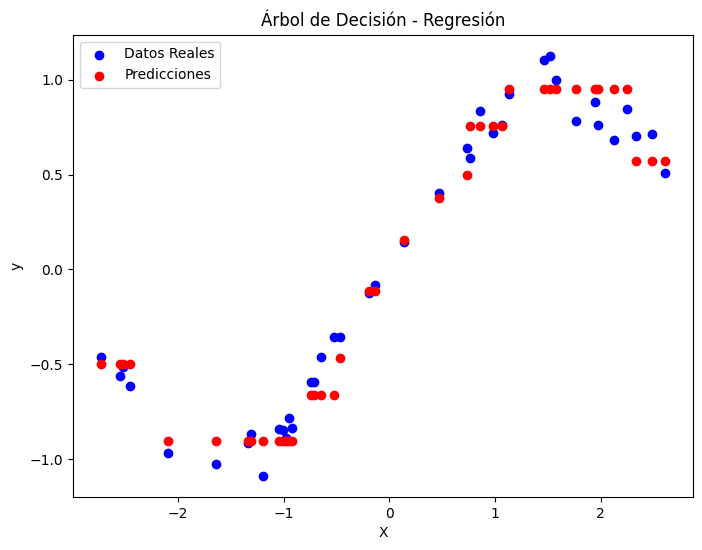

In [10]:
X_reg = np.linspace(-3, 3, 200).reshape(-1, 1)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Árbol de decisión para regresión
dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_regressor.fit(X_train_r, y_train_r)

y_pred_r = dt_regressor.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
print(f'MSE del Árbol de Decisión (Regresión): {mse:.4f}')

# Visualización del resultado de la regresión
plt.figure(figsize=(8, 6))
plt.scatter(X_test_r, y_test_r, color='blue', label='Datos Reales')
plt.scatter(X_test_r, y_pred_r, color='red', label='Predicciones')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Árbol de Decisión - Regresión')
plt.show()
